<a href="https://colab.research.google.com/github/aimanhaziqmy/Data-analytics-cardiovascular-disease/blob/main/Cardiovascular_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Disease Dataset - Analysis on CVD risk

dataset from kaggle : [Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
data = pd.read_csv(r"/content/cardio_train.csv", sep=';', encoding='utf-8')

In [9]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Analyse the CVD dataframe

In [11]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [12]:
data.shape

(70000, 13)

In [13]:
data.index

RangeIndex(start=0, stop=70000, step=1)

In [14]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [15]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [18]:
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Data Cleaning

In [20]:
# Analyse missing value
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [29]:
# Finding any outliers using Z-score techniques
threshold = 5

outliers = pd.DataFrame()
for column in data.columns:
  z_scores = stats.zscore(data[column])
  column_outliers = data[abs(z_scores) > threshold]
  outliers = pd.concat([outliers, column_outliers])


In [30]:
outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0
3420,4838,14516,1,100,70.0,100,70,1,1,0,0,1,0
3735,5278,17642,1,120,70.0,120,70,1,1,0,0,1,0
3752,5306,15400,1,120,30.0,110,70,1,1,0,0,1,0
4212,5946,16110,1,120,80.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67474,96344,19657,1,161,93.0,160,1200,3,1,0,0,0,1
68037,97173,15164,2,161,93.0,170,1100,1,1,0,0,1,1
68288,97529,23486,2,161,84.0,180,1100,1,1,0,0,1,1
68538,97907,19062,1,166,70.0,160,10000,2,1,0,0,1,1


## Data Visualisation

<ipython-input-39-6447762453e8>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['height'], data['weight'], cmap="viridis", alpha=0.7)


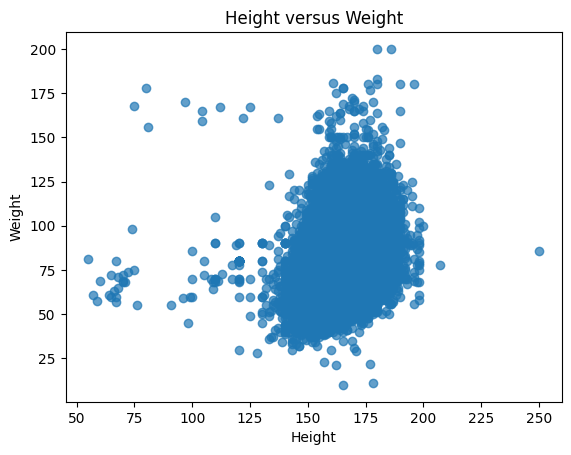

In [39]:
# Height versus Weight
plt.scatter(data['height'], data['weight'], cmap="viridis", alpha=0.7)

plt.title("Height versus Weight")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [45]:
# Count by gender
# data.head()
data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

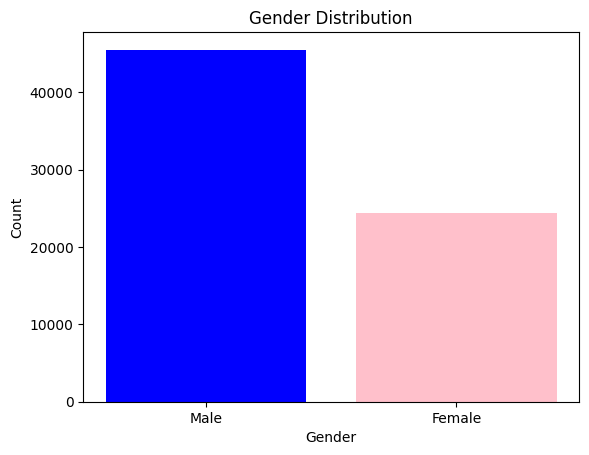

In [46]:
genders = ['Male', 'Female']
gender_count = [45530, 24470]

plt.bar(genders, gender_count, color=['blue','pink'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.show()

In [ ]:
# Group by physical activities versus presence of CVD

In [ ]:
# Group by Alcolhol intake versus presence of CVD

In [ ]:
# Group by Smoking versus presence of CVD

In [ ]:
# Group by Cholestrol versus presence of CVD

## Summary Statistics

In [ ]:
# mean

In [ ]:
# median

In [ ]:
# mode

In [ ]:
# min

In [ ]:
# max

## Feature *engineering*
Creating new features or transforming existing ones to improve the performance of predictive models.

## Data Analysis

- Correlation analysis to identify relationships between variables.
- Statistical tests to assess the significance of different features.
- Machine learning models for prediction and classification tasks.

In [ ]:
# Correlation

In [ ]:
# Classification